# Introduction

The notebook is intended to show Seaborn plot examples.

In [30]:
# Import Standard Libraries
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker

import seaborn as sns

In [2]:
# Read data
data = sns.load_dataset('titanic')
time_data = sns.load_dataset('taxis')

In [3]:
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
time_data.head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [5]:
time_data['pickup_borough'].nunique()

4

# Theme

In [6]:
# Define Seaborn theme parameters
theme_parameters =  {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'grid.alpha':0.3,
    'figure.figsize': (16, 6),
    'font.family': 'Andale Mono',
    'axes.titlesize': 24,
    'figure.facecolor': '#E5E8E8',
    'axes.facecolor': '#E5E8E8'
}

# Set the theme
sns.set_theme(style='whitegrid',
              palette=sns.color_palette('deep'), 
              rc=theme_parameters)

# Plots

## Counterplot

It is used for discrete variables.

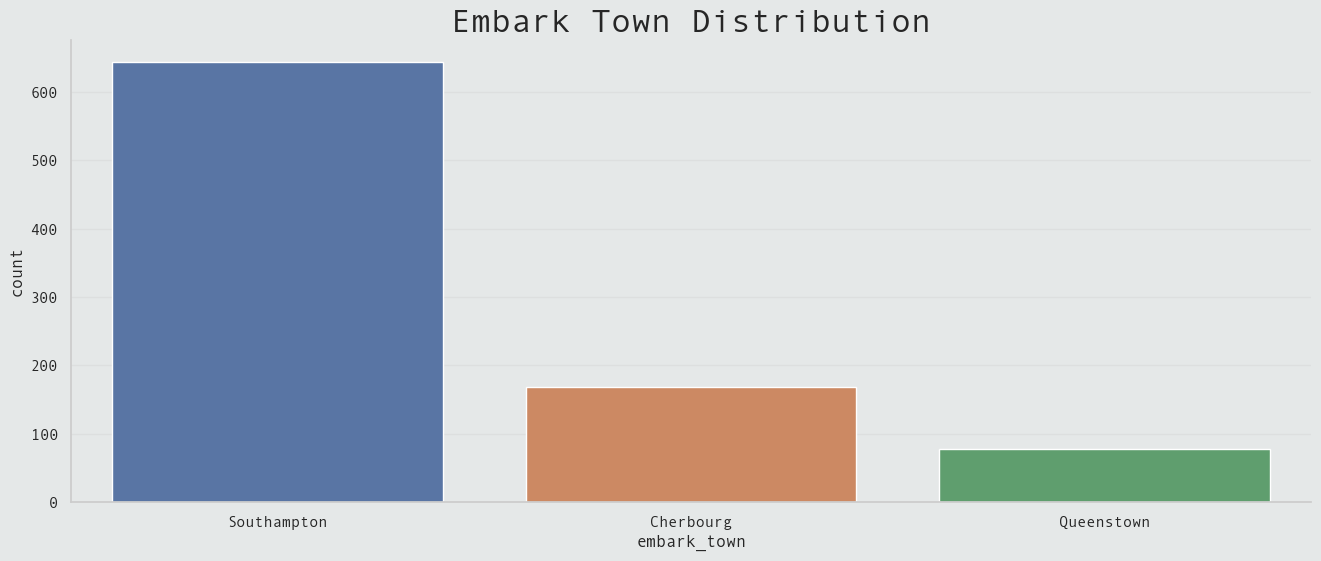

In [7]:
# Plot 'counterplot' of 'embark_town'
ax = sns.countplot(data=data, 
                   x='embark_town')
ax.set_title('Embark Town Distribution')
plt.show()

## Barplot

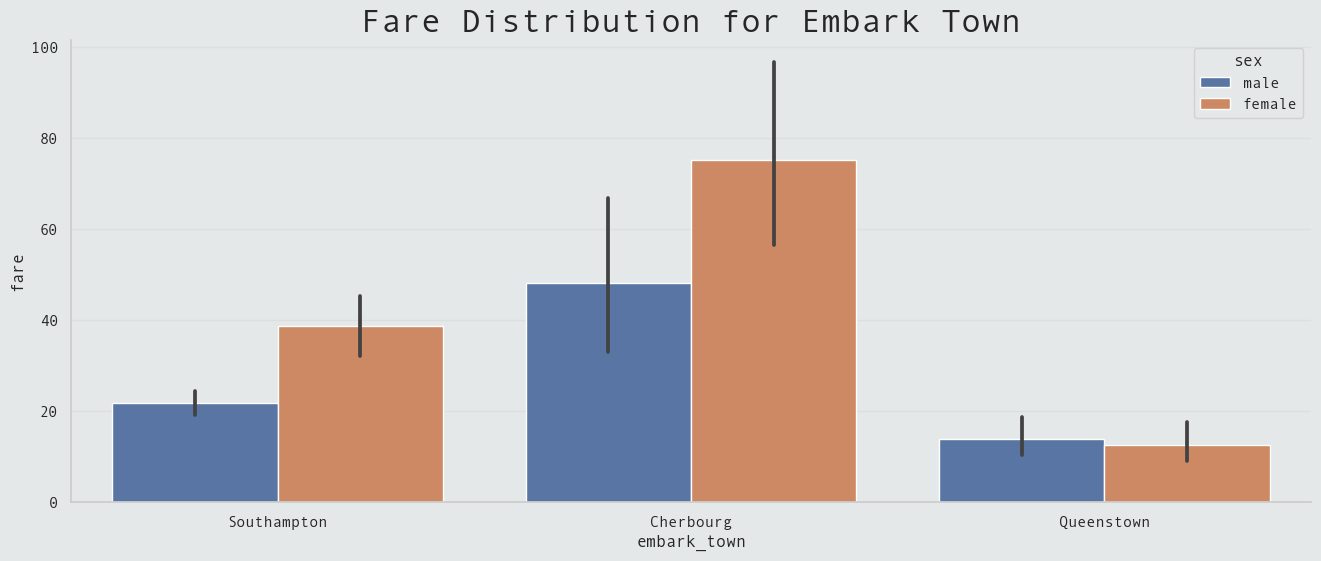

In [8]:
# Plot 'barplot' of 'fare' for 'embark_town'
ax = sns.barplot(data=data, 
                 x='embark_town', 
                 y='fare', 
                 hue='sex')
ax.set_title('Fare Distribution for Embark Town')
plt.show()

## Histogram

Is is used for continuos variables.

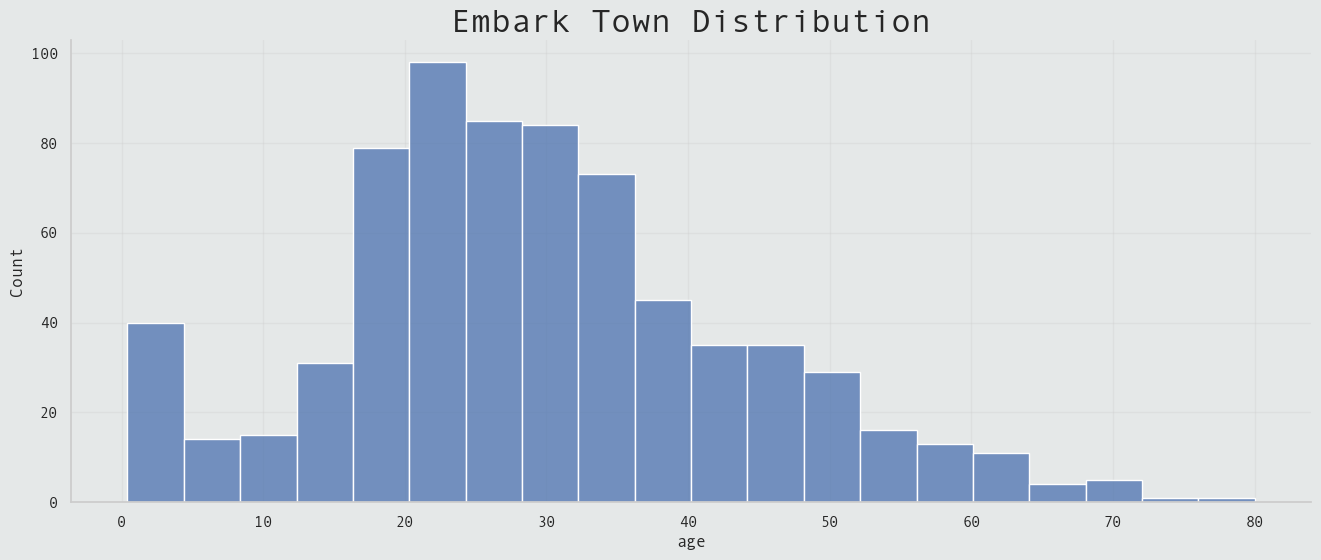

In [9]:
ax = sns.histplot(data=data, 
                  x='age')
ax.set_title('Embark Town Distribution')
plt.show()

## Lineplot

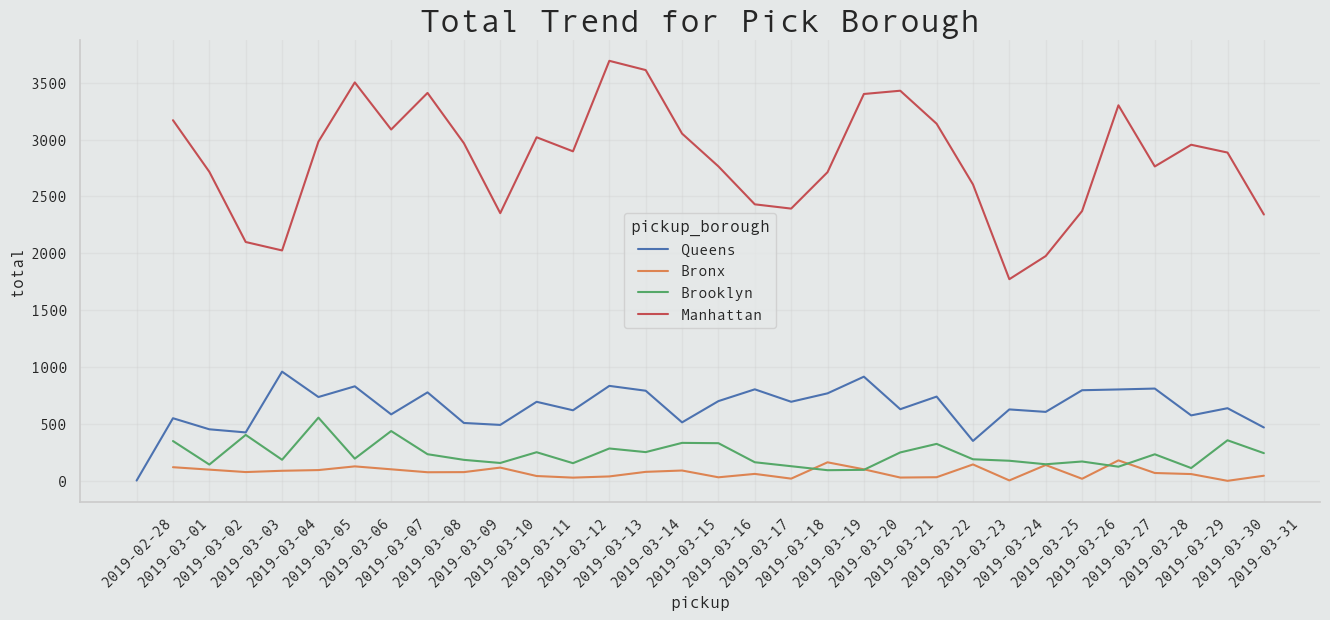

In [12]:
ax = sns.lineplot(
    data=time_data.groupby([
        time_data.pickup.dt.strftime('%Y-%m-%d'), time_data.pickup_borough 
    ])['total'].sum().reset_index(), 
    x='pickup', 
    y='total', 
    hue='pickup_borough'
)

ax.set_title('Total Trend for Pick Borough')

plt.xticks(rotation=45)

plt.show()

# Utils

## Null Values Percentage

[Reference Notebook](https://www.kaggle.com/code/jcaliz/tps-sep22-eda-baseline-you-were-looking-for)

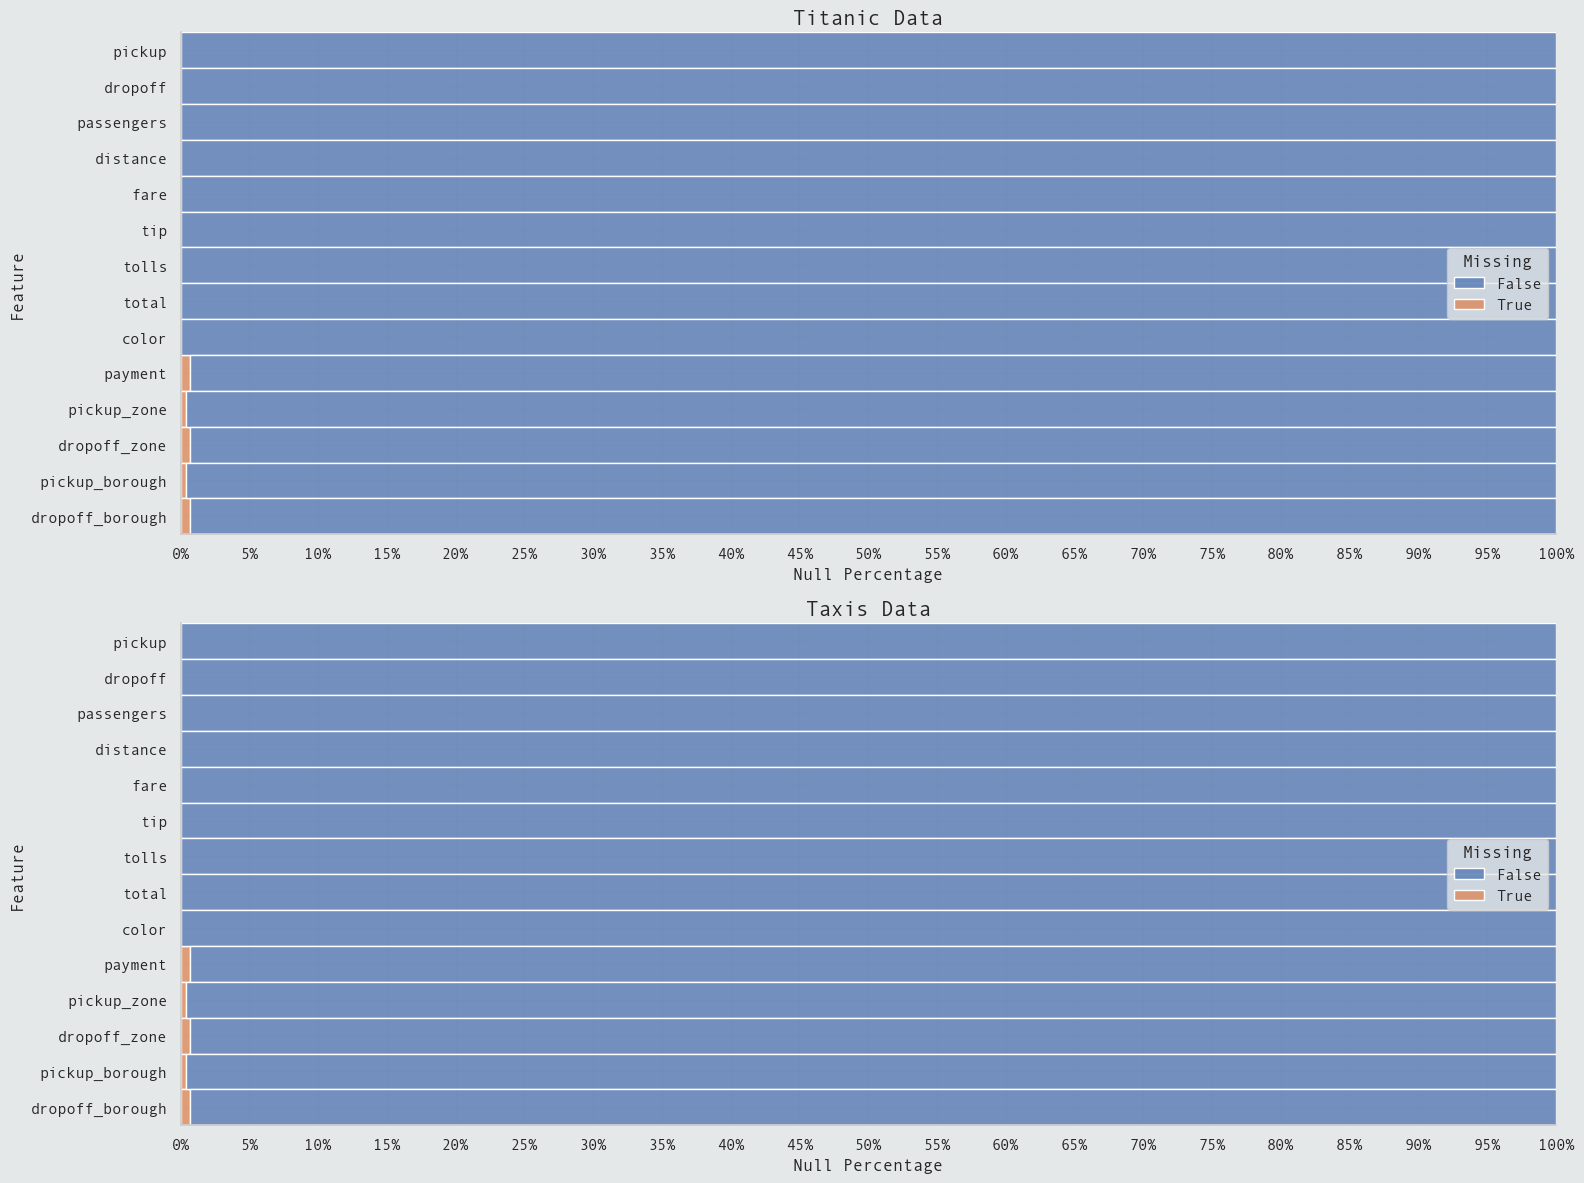

In [39]:
# Define data to display
data_to_display = {
    'Titanic Data': data,
    'Taxis Data': time_data
}

# Create figure
figure = plt.figure(tight_layout=True, figsize=(16, 12))

# Define figure's subplots
grid_spec = GridSpec(len(data_to_display), 1)

# Fetch data to plot
for row, (name, data) in enumerate(data_to_display.items()):
    
    # Create subplot
    ax = figure.add_subplot(grid_spec[row, 0])
    
    sns.histplot(data=data.isna().melt(var_name='Feature', value_name='Missing'), 
                 y='Feature', 
                 hue='Missing', 
                 multiple='fill',
                 ax=ax)
    
    # Refactor x label as missing percentage
    ax.xaxis.set_major_locator(ticker.LinearLocator(21))
    ax.xaxis.set_major_formatter('{:.0%}'.format)
    
    # Set title and label
    ax.set_title(name, fontsize=15)
    ax.set_xlabel('Null Percentage');